Import Libraries

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

Load and Explore DataSet

In [326]:
customers_df = pd.read_csv('Customers.csv')

In [327]:
customers_df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [328]:
# check null values
customers_df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Fill missing column

In [329]:
impute = SimpleImputer(strategy='most_frequent')

In [330]:
customers_df['Profession'] = impute.fit_transform(customers_df[['Profession']]).ravel()

In [331]:
# check null values after impute
customers_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [332]:
# check duplicates
print(f'Duplicates in dataset = {customers_df.duplicated().sum()}')

Duplicates in dataset = 0


In [333]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              2000 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [334]:
customers_df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


Encode Categorical Columns

In [335]:
catg_cols = customers_df.select_dtypes(include='object').columns.to_list()
catg_cols

['Gender', 'Profession']

In [336]:
l_encoder = LabelEncoder()
oh_encoder = OneHotEncoder(sparse_output=False ,handle_unknown='ignore')

In [337]:
customers_df['Gender'] = l_encoder.fit_transform(customers_df[['Gender']])

c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [338]:
encoded_df = oh_encoder.fit_transform(customers_df[['Profession']])
encoded_df = pd.DataFrame(encoded_df , columns=oh_encoder.get_feature_names_out(['Profession']))
encoded_df

,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [339]:
# concat
customers_df = pd.concat([customers_df , encoded_df] , axis=1).drop(columns = ['Profession'] , axis = 1)
customers_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,1,19,15000,39,1,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,21,35000,81,3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,20,86000,6,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,23,59000,77,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0,31,38000,40,2,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,8,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,1997,0,91,73158,32,7,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,1998,1,87,90961,14,9,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1998,1999,1,77,182109,4,7,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Create Kmeans model

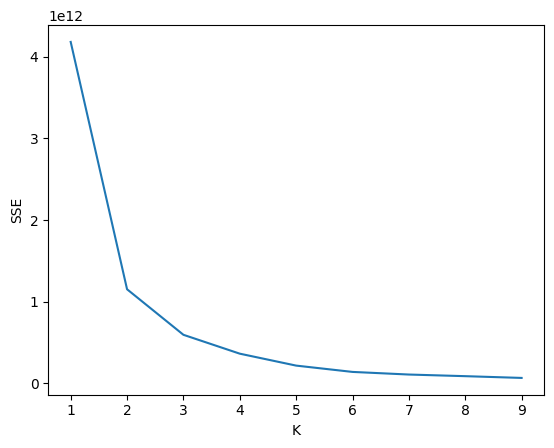

In [340]:
# find best n_clusters for model
k_range = range(1,10)
sse = []
X = customers_df.iloc[:,1:]

for k in k_range:
    km_model = KMeans(n_clusters=k)
    km_model.fit(X)
    sse.append(km_model.inertia_)

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)
plt.show()

In [341]:
kmean_model = KMeans(n_clusters=3,random_state=42)

In [342]:
# fit predict model
kmean_pred = kmean_model.fit_predict(X)

In [343]:
customers_df['kmean_cluster'] = kmean_pred
customers_df['kmean_cluster'].value_counts()

kmean_cluster
1    710
0    699
2    591
Name: count, dtype: int64

In [344]:
customers_df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,kmean_cluster
0,1,1,19,15000,39,1,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,2,1,21,35000,81,3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,3,0,20,86000,6,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,0,23,59000,77,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,31,38000,40,2,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
5,6,0,22,58000,76,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,7,0,35,31000,6,1,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
7,8,0,23,84000,94,1,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
8,9,1,64,97000,3,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,10,0,30,98000,72,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [345]:
cluster0 = customers_df[customers_df['kmean_cluster'] == 0]  
cluster1 = customers_df[customers_df['kmean_cluster'] == 1]  
cluster2 = customers_df[customers_df['kmean_cluster'] == 2]  

Create GMM

In [346]:
gmm = GaussianMixture(n_components=3,random_state=42)

In [347]:
gmm_pred = gmm.fit_predict(X)

In [348]:
customers_df['GMM_Cluster'] = gmm_pred
customers_df['GMM_Cluster'].value_counts()

GMM_Cluster
1    1459
2     388
0     153
Name: count, dtype: int64

In [349]:
customers_df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,kmean_cluster,GMM_Cluster
0,1,1,19,15000,39,1,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1
1,2,1,21,35000,81,3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
2,3,0,20,86000,6,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,4,0,23,59000,77,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2
4,5,0,31,38000,40,2,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,1
5,6,0,22,58000,76,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
6,7,0,35,31000,6,1,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1
7,8,0,23,84000,94,1,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
8,9,1,64,97000,3,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
9,10,0,30,98000,72,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [350]:
gmm_cluster0 = customers_df[customers_df['GMM_Cluster'] == 0]  
gmm_cluster1 = customers_df[customers_df['GMM_Cluster'] == 1]  
gmm_cluster2 = customers_df[customers_df['GMM_Cluster'] == 2]  

Visualize results

C:\Users\Bassam\AppData\Local\Temp\ipykernel_28548\2087137963.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


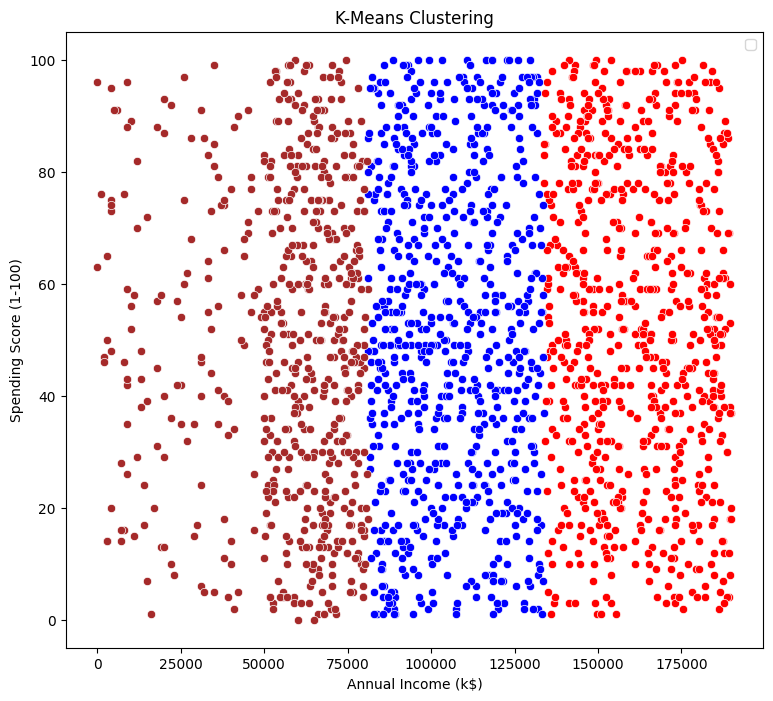

In [351]:
# Visualize kmeans clusters
plt.figure(figsize=(9,8))
sns.scatterplot(data=cluster0 , x='Annual Income ($)' , y='Spending Score (1-100)', color='red')
sns.scatterplot(data=cluster1 , x='Annual Income ($)' , y='Spending Score (1-100)', color='blue')
sns.scatterplot(data=cluster2 , x='Annual Income ($)' , y='Spending Score (1-100)', color='brown')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

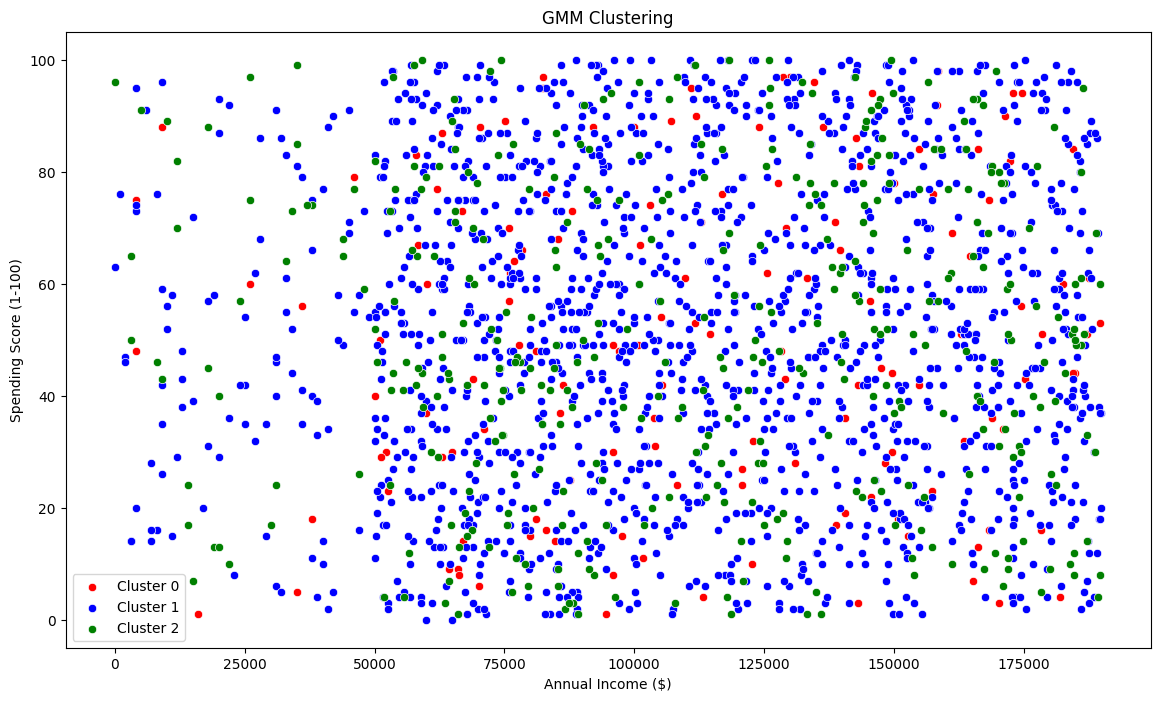

In [352]:
# Visualize GMM clusters
plt.figure(figsize=(14,8))
sns.scatterplot(data=gmm_cluster0 , x='Annual Income ($)', y='Spending Score (1-100)', color='red', label='Cluster 0')
sns.scatterplot(data=gmm_cluster1 , x='Annual Income ($)', y='Spending Score (1-100)', color='blue', label='Cluster 1')
sns.scatterplot(data=gmm_cluster2 , x='Annual Income ($)', y='Spending Score (1-100)', color='green', label='Cluster 2')


plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering')
plt.legend()
plt.show()


Evaluate models

In [353]:
#KMeans
sil_kmeans = silhouette_score(X, kmean_pred)
print("KMeans Silhouette Score:", sil_kmeans)

#GMM
sil_gmm = silhouette_score(X, gmm_pred)
print("GMM Silhouette Score:", sil_gmm)

KMeans Silhouette Score: 0.5576366676747612
GMM Silhouette Score: -0.012423575366215836
